# Libraries

In [1]:
installed = False

while not installed:
    try:
        import time
        import os

        import numpy as np
        import pandas as pd

        import matplotlib.pyplot as plt
        import seaborn as sns

        import tensorflow as tf
        from tensorflow import keras

        from riotwatcher import LolWatcher, ApiError
        
        installed = True

    except ModuleNotFoundError:
        installed = False
        %pip install -U riotwatcher
        %pip install -q -U seaborn
        %pip install -U tensorflow

# API & Account Settings

In [2]:
os.environ["riotAPI"] = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX" # change me

### API Key

In [3]:
API_KEY = os.getenv('riotAPI')

### Account Settings

In [9]:
region = "euw1" # change me
summoner_name = "Amico Mio" # change me
n_games = 100

# Dataset from Riot API

In [10]:
lol_watcher = LolWatcher(API_KEY)
my_region = region
me = lol_watcher.summoner.by_name(my_region, summoner_name)
my_ranked_stats = lol_watcher.league.by_summoner(my_region, me['id'])

In [11]:
versions = lol_watcher.data_dragon.versions_for_region(my_region)
champions_version = versions['n']['champion']
summoner_spells_version=versions['n']['summoner']
items_version=versions['n']['item']

current_champ_list = lol_watcher.data_dragon.champions(champions_version)
current_summoner_list = lol_watcher.data_dragon.summoner_spells(summoner_spells_version)

matches_ids = lol_watcher.match.matchlist_by_puuid(my_region, me['puuid'], count=n_games)

In [12]:
games = {}

participants = []
for i in range(n_games):
    print(f"Fetching game {i+1} of {n_games}")
    try:
        last_match = matches_ids[i]

        match_detail = lol_watcher.match.by_id(my_region, last_match)

        champ_dict = {}
        for key in current_champ_list['data']: 
            row = current_champ_list['data'][key] 
            champ_dict[row['key']] = row['id']

        summoners_dict = {}
        for key in current_summoner_list['data']:
            row = current_summoner_list['data'][key]
            summoners_dict[row['key']] = row['id']

        match_metadata = match_detail['metadata']
        match_info = match_detail['info']
        participants_details = match_info['participants']
        

        for row in participants_details:
                participants_row = {}
                
                participants_row['win'] = row['win']
                participants_row['assists'] = row['assists']
                participants_row['baronKills'] = row['baronKills']
                participants_row['champLevel'] = row['champLevel']  
                participants_row['champion'] = champ_dict[str(row['championId'])] 
                participants_row['deaths'] = row['deaths']  
                participants_row['dragonKills'] = row['dragonKills'] 
                participants_row['firstBloodKill'] = row['firstBloodKill']  
                participants_row['firstTowerKill'] = row['firstTowerKill']  
                participants_row['gameEndedInEarlySurrender'] = row['gameEndedInEarlySurrender']
                participants_row['gameEndedInSurrender'] = row['gameEndedInSurrender']
                participants_row['goldEarned'] = row['goldEarned']
                participants_row['goldSpent'] = row['goldSpent']
                participants_row['individualPosition'] = row['individualPosition']
                participants_row['inhibitorKills'] = row['inhibitorKills']
                participants_row['inhibitorTakedowns'] = row['inhibitorTakedowns']
                participants_row['inhibitorsLost'] = row['inhibitorsLost']
                participants_row['kills'] = row['kills']
                participants_row['magicDamageDealt'] = row['magicDamageDealt']   
                participants_row['neutralMinionsKilled'] = row['neutralMinionsKilled']
                participants_row['pentaKills'] = row['pentaKills']
                participants_row['physicalDamageDealt'] = row['physicalDamageDealt']
                participants_row['spell1'] = summoners_dict[str(row['summoner1Id'])]
                participants_row['spell2'] = summoners_dict[str(row['summoner2Id'])]
                participants_row['Summoner_name'] = lol_watcher.summoner.by_id(my_region, row['summonerId']).get('name')
                participants_row['timeCCingOthers'] = row['timeCCingOthers']
                participants_row['totalDamageDealt'] = row['totalDamageDealt']
                participants_row['totalHeal'] = row['totalHeal']
                participants_row['totalMinionsKilled'] = row['totalMinionsKilled']
                participants_row['trueDamageDealt'] = row['trueDamageDealt']  
                participants_row['turretTakedowns'] = row['turretTakedowns']  
                participants_row['visionScore'] = row['visionScore']  
                participants_row['wardsPlaced'] = row['wardsPlaced'] 
                   
                participants_row['matchId'] = match_detail['metadata']['matchId']
                participants_row['gameDuration'] = match_info['gameDuration']
                participants_row['gameCreation'] = match_info['gameCreation']
                participants_row['gameStartTimestamp'] = match_info['gameStartTimestamp']
                participants_row['gameEndTimestamp'] = match_info['gameEndTimestamp']
                participants_row['gameMode'] = match_info['gameMode']
                participants_row['gameType'] = match_info['gameType']

                participants.append(participants_row)
        
        time.sleep(10)
                
    except ApiError as err:
         print(err)
         time.sleep(10)
         continue 

Fetching game 1 of 100
Fetching game 2 of 100
Fetching game 3 of 100
Fetching game 4 of 100
Fetching game 5 of 100
Fetching game 6 of 100
Fetching game 7 of 100
Fetching game 8 of 100
Fetching game 9 of 100
Fetching game 10 of 100
Fetching game 11 of 100
Fetching game 12 of 100
Fetching game 13 of 100
Fetching game 14 of 100
Fetching game 15 of 100
Fetching game 16 of 100
Fetching game 17 of 100
Fetching game 18 of 100
Fetching game 19 of 100
Fetching game 20 of 100
Fetching game 21 of 100
Fetching game 22 of 100
Fetching game 23 of 100
Fetching game 24 of 100
Fetching game 25 of 100
Fetching game 26 of 100
Fetching game 27 of 100
Fetching game 28 of 100
Fetching game 29 of 100
Fetching game 30 of 100
Fetching game 31 of 100
Fetching game 32 of 100
Fetching game 33 of 100
Fetching game 34 of 100
Fetching game 35 of 100
Fetching game 36 of 100
Fetching game 37 of 100
Fetching game 38 of 100
Fetching game 39 of 100
Fetching game 40 of 100
Fetching game 41 of 100
Fetching game 42 of 100
F

# CSV file

In [13]:
current_dir = os.path.dirname(os.getcwd())
df = pd.DataFrame(participants)
df.to_csv(f'{current_dir}/csv/{summoner_name}.csv', index=False)

### Import local CSV's (uncomment)

In [14]:
df1 = pd.read_csv(f"{current_dir}/csv/example1.csv")
df2 = pd.read_csv(f"{current_dir}/csv/example2.csv")
df = pd.concat([df1, df2])

### Assign Feature Type

In [15]:
df = df.astype({
    "win": int, 
    "assists": int,
    "baronKills": int,
    "champLevel": int,
    "champion": str,
    "deaths": int,
    "dragonKills": int,
    "firstBloodKill": int,
    "firstTowerKill": int,
    "gameEndedInEarlySurrender": int,
    "gameEndedInSurrender": int,
    "goldEarned": int,
    "goldSpent": int,
    "individualPosition" : str,
    "inhibitorKills" : int,
    "inhibitorTakedowns" : int,
    "inhibitorsLost" : int,
    "kills" : int,
    "magicDamageDealt" : int,
    "neutralMinionsKilled" : int,
    "pentaKills" : int,
    "physicalDamageDealt" : int,
    "spell1" : str,
    "spell2" : str,
    "Summoner_name" : str,
    "timeCCingOthers" : int,
    "totalDamageDealt" : int,
    "totalHeal" : int,
    "totalMinionsKilled" : int,
    "trueDamageDealt" : int,
    "turretTakedowns" : int,
    "visionScore" : int,
    "wardsPlaced" : int,
    "matchId" : str,
    "gameDuration" : int,
    "gameMode" : str,
    "gameType" : str,
    })

df["gameCreation"] = pd.to_datetime(df["gameCreation"], unit='ms')
df["gameStartTimestamp"] = pd.to_datetime(df["gameCreation"], unit='ms')
df["gameEndTimestamp"] = pd.to_datetime(df["gameCreation"], unit='ms')

### Filter by Summoner Name

In [16]:
summoner_df = df[df.Summoner_name == summoner_name]
summoner_df = summoner_df.reset_index(drop=True)

In [17]:
summoner_df

,win,assists,baronKills,champLevel,champion,deaths,dragonKills,firstBloodKill,firstTowerKill,gameEndedInEarlySurrender,...,turretTakedowns,visionScore,wardsPlaced,matchId,gameDuration,gameCreation,gameStartTimestamp,gameEndTimestamp,gameMode,gameType
0,1,16,0,18,Belveth,4,2,0,0,0,...,7,41,0,EUW1_6333433318,2235,2023-03-26 20:08:16.579,2023-03-26 20:08:16.579,2023-03-26 20:08:16.579,CLASSIC,MATCHED_GAME
1,1,4,0,12,MonkeyKing,2,1,0,0,0,...,6,13,1,EUW1_6333320894,1214,2023-03-26 19:14:05.101,2023-03-26 19:14:05.101,2023-03-26 19:14:05.101,CLASSIC,MATCHED_GAME
2,1,24,1,17,JarvanIV,4,4,0,0,0,...,2,31,3,EUW1_6332885770,1790,2023-03-26 15:34:33.072,2023-03-26 15:34:33.072,2023-03-26 15:34:33.072,CLASSIC,MATCHED_GAME
3,1,14,2,18,Belveth,4,3,0,0,0,...,5,41,2,EUW1_6332722902,1852,2023-03-26 14:12:24.864,2023-03-26 14:12:24.864,2023-03-26 14:12:24.864,CLASSIC,MATCHED_GAME
4,1,12,1,18,Belveth,10,3,1,1,0,...,4,55,1,EUW1_6332614994,2875,2023-03-26 13:12:37.034,2023-03-26 13:12:37.034,2023-03-26 13:12:37.034,CLASSIC,MATCHED_GAME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1,16,0,16,Lillia,11,0,0,0,0,...,1,25,7,EUW1_6185714040,1992,2022-12-11 21:31:13.066,2022-12-11 21:31:13.066,2022-12-11 21:31:13.066,CLASSIC,MATCHED_GAME
182,1,13,0,16,Twitch,6,0,0,1,0,...,6,27,3,EUW1_6185652582,1731,2022-12-11 20:55:57.313,2022-12-11 20:55:57.313,2022-12-11 20:55:57.313,CLASSIC,MATCHED_GAME
183,0,10,1,17,Kaisa,8,0,0,1,0,...,2,48,9,EUW1_6184208557,2357,2022-12-10 23:24:14.067,2022-12-10 23:24:14.067,2022-12-10 23:24:14.067,CLASSIC,MATCHED_GAME
184,0,14,1,18,Teemo,12,0,0,1,0,...,3,18,7,EUW1_6184132869,2430,2022-12-10 22:38:54.287,2022-12-10 22:38:54.287,2022-12-10 22:38:54.287,CLASSIC,MATCHED_GAME


# Feature variables and Target variable

In [18]:
X = summoner_df.drop([
    'champion', 'matchId', 'individualPosition', 'spell2', 'spell1', 'win', 'Summoner_name',
    'gameDuration', 'gameCreation', 'gameStartTimestamp', 'gameEndTimestamp', 'gameMode', 'gameType'
    ], axis=1)
y = summoner_df.iloc[:, summoner_df.columns == 'win']['win']

### Shapes

In [19]:
print(X.shape)
print(y.shape)
print(y)

(186, 27)
(186,)
0      1
1      1
2      1
3      1
4      1
      ..
181    1
182    1
183    0
184    0
185    1
Name: win, Length: 186, dtype: int32


# Z-Score Normalization

In [20]:
mean=X.mean(axis=0)
std=X.std(axis=0)
X=(X-mean)/std

X.head()

,assists,baronKills,champLevel,deaths,dragonKills,firstBloodKill,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,goldEarned,...,pentaKills,physicalDamageDealt,timeCCingOthers,totalDamageDealt,totalHeal,totalMinionsKilled,trueDamageDealt,turretTakedowns,visionScore,wardsPlaced
0,0.841234,-0.545703,1.010525,-0.818891,0.842852,-0.374627,-0.346171,-0.147851,-0.505348,0.601330,...,-0.103977,0.880219,-0.057325,0.938385,0.628670,-0.842313,1.087297,2.134213,1.265955,-0.995379
1,-0.964184,-0.545703,-0.974943,-1.370753,0.055061,-0.374627,-0.346171,-0.147851,-0.505348,-1.161816,...,-0.103977,-0.470756,-0.696402,-0.628366,-0.205794,-1.198885,0.313516,1.663319,-0.899265,-0.807610
2,2.044846,1.145976,0.679614,-0.818891,2.418434,-0.374627,-0.346171,-0.147851,-0.505348,0.578181,...,-0.103977,0.950538,0.245395,0.786814,0.930236,-0.510333,0.717580,-0.220257,0.492662,-0.432071
3,0.540331,2.837654,1.010525,-0.818891,1.630643,-0.374627,-0.346171,-0.147851,-0.505348,1.012969,...,-0.103977,0.680554,0.211760,0.808790,1.863445,-0.436559,1.350315,1.192425,1.265955,-0.619841
4,0.239428,1.145976,1.010525,0.836693,1.630643,2.654968,2.873217,-0.147851,-0.505348,2.491377,...,-0.103977,2.162450,0.514480,3.043880,1.639531,0.571678,2.888538,0.721531,2.348565,-0.807610


# Pairplot for Win and Lose

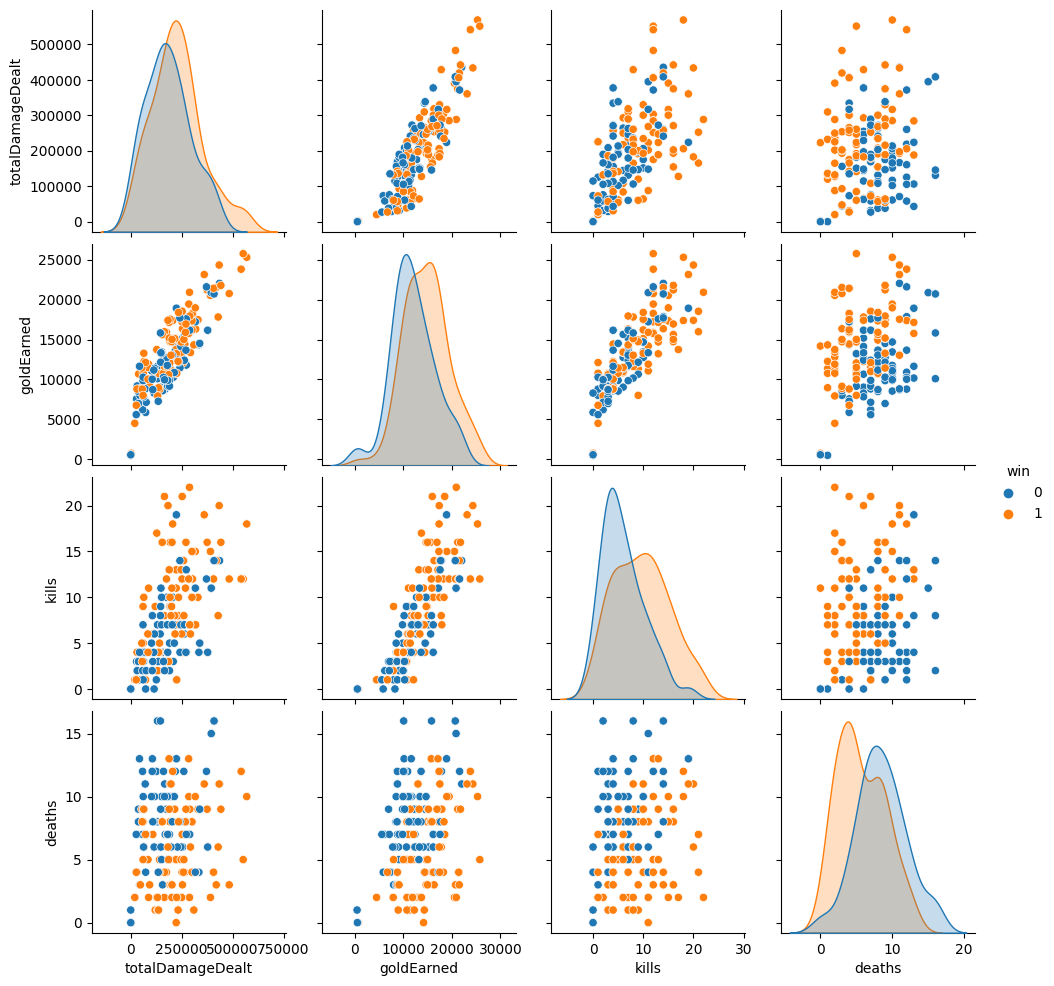

In [21]:
sns.pairplot(summoner_df[['totalDamageDealt', 'goldEarned', 'kills', 'deaths', 'win']], hue = 'win', diag_kind="kde")

# Correlation Plot

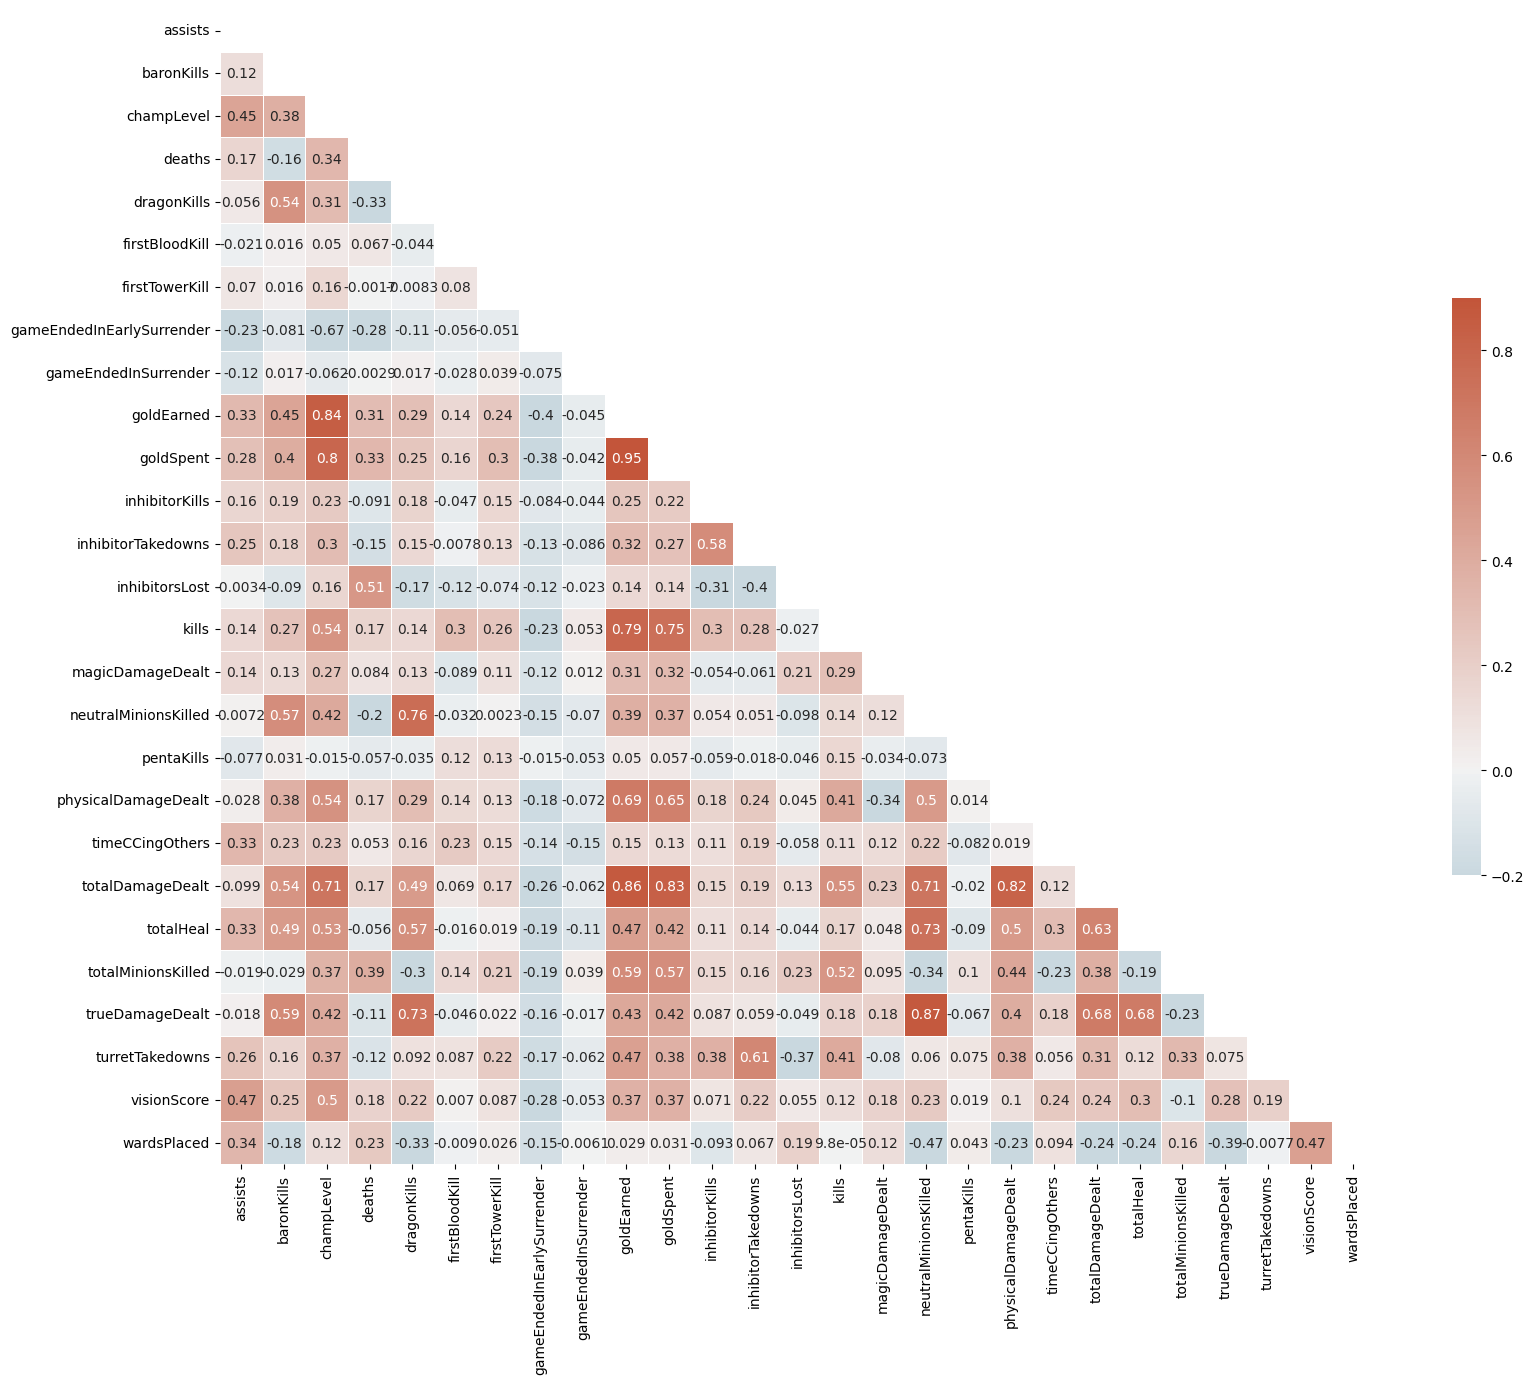

In [22]:
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.9, center=0, vmin=-0.2, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

# NN Model

In [32]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

tf.random.set_seed(1234)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X.shape[1],), activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3584      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69,633
Trainable params: 69,633
Non-trainable params: 0
_________________________________________________________________


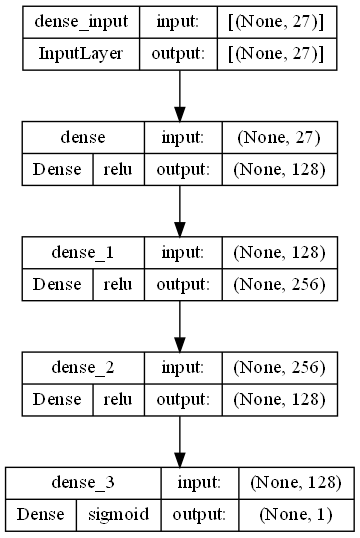

In [33]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=100,
    layer_range=None,
    show_layer_activations=True,
)

## Epochs and learning rate scheduler step

In [34]:
epochs = 200
step = int(epochs/5)
init_weights = model.get_weights()

Find a good learning rate value by running the model for 200 epochs and changing the learning rate by an order of magnitude. It will try all learning rates between 1e-8 and 1e-3

In [35]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / step))

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer=optimizer)

# Train the model
history = model.fit(X, y, epochs=epochs, callbacks=[lr_schedule])

Epoch 1/200
6/6 [==============================] - 1s 22ms/step - loss: 0.7560 - lr: 1.0000e-08
Epoch 2/200
6/6 [==============================] - 0s 9ms/step - loss: 0.7560 - lr: 1.0593e-08
Epoch 3/200
6/6 [==============================] - 0s 8ms/step - loss: 0.7560 - lr: 1.1220e-08
Epoch 4/200
6/6 [==============================] - 0s 10ms/step - loss: 0.7560 - lr: 1.1885e-08
Epoch 5/200
6/6 [==============================] - 0s 12ms/step - loss: 0.7560 - lr: 1.2589e-08
Epoch 6/200
6/6 [==============================] - 0s 10ms/step - loss: 0.7560 - lr: 1.3335e-08
Epoch 7/200
6/6 [==============================] - 0s 11ms/step - loss: 0.7560 - lr: 1.4125e-08
Epoch 8/200
6/6 [==============================] - 0s 8ms/step - loss: 0.7560 - lr: 1.4962e-08
Epoch 9/200
6/6 [==============================] - 0s 8ms/step - loss: 0.7560 - lr: 1.5849e-08
Epoch 10/200
6/6 [==============================] - 0s 9ms/step - loss: 0.7560 - lr: 1.6788e-08
Epoch 11/200
6/6 [==========================

### Loss ~ learning rate

(1e-08, 0.0009440608762859226, 0.0, 0.7560204863548279)

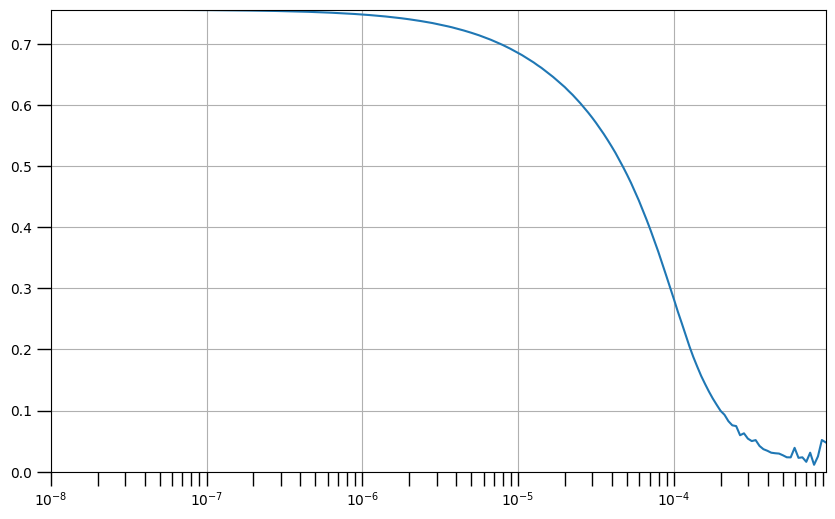

In [36]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(epochs) / step))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

plt.axis([1e-8, max(lrs), 0, max(history.history["loss"])])

In [84]:
learning_rate = 1e-4 # good lr from graph

# Reset the weights
model.set_weights(init_weights)

## Compile model with learning rate found

In [85]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

model.compile(
    loss='binary_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=['accuracy'])

## Fit the model with a validation split of 0.2 and few epochs in order to avoid overfitting

In [86]:
history = model.fit(X, y, epochs=30, validation_split=0.2) #early stopping to avoid overfitting -> few epochs 

Epoch 1/30
5/5 [==============================] - 2s 84ms/step - loss: 0.7489 - accuracy: 0.4054 - val_loss: 0.7016 - val_accuracy: 0.6053
Epoch 2/30
5/5 [==============================] - 0s 20ms/step - loss: 0.7054 - accuracy: 0.4730 - val_loss: 0.6803 - val_accuracy: 0.5789
Epoch 3/30
5/5 [==============================] - 0s 21ms/step - loss: 0.6736 - accuracy: 0.6014 - val_loss: 0.6622 - val_accuracy: 0.6842
Epoch 4/30
5/5 [==============================] - 0s 25ms/step - loss: 0.6418 - accuracy: 0.7365 - val_loss: 0.6449 - val_accuracy: 0.7105
Epoch 5/30
5/5 [==============================] - 0s 25ms/step - loss: 0.6160 - accuracy: 0.7838 - val_loss: 0.6274 - val_accuracy: 0.7368
Epoch 6/30
5/5 [==============================] - 0s 23ms/step - loss: 0.5918 - accuracy: 0.7973 - val_loss: 0.6090 - val_accuracy: 0.7368
Epoch 7/30
5/5 [==============================] - 0s 22ms/step - loss: 0.5690 - accuracy: 0.8176 - val_loss: 0.5927 - val_accuracy: 0.7368
Epoch 8/30
5/5 [===========

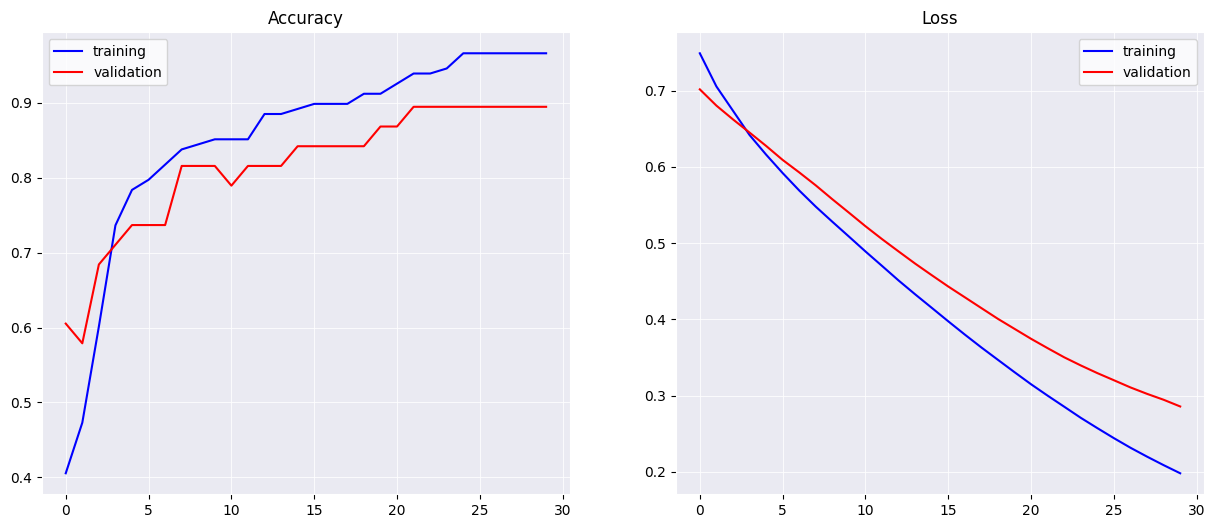

In [87]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=False)
ax[0].plot(epochs, acc,
          color='b',
          label='training')
ax[0].plot(epochs, val_acc,
          color='r',
          label='validation')
ax[0].set_title('Accuracy')
ax[0].grid(which='both', alpha=0.8, c='white')
ax[0].set_facecolor('#eaeaf2')
ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('white')
ax[0].spines['right'].set_color('white')
ax[0].spines['left'].set_color('white')
ax[0].legend()
ax[1].plot(epochs, loss,
          color='b',
          label='training')
ax[1].plot(epochs, val_loss,
          color='r',
          label='validation')
ax[1].set_title('Loss')
ax[1].grid(which='both', alpha=0.8, c='white')
ax[1].set_facecolor('#eaeaf2')
ax[1].spines['bottom'].set_color('white')
ax[1].spines['top'].set_color('white')
ax[1].spines['right'].set_color('white')
ax[1].spines['left'].set_color('white')
ax[1].legend()

plt.savefig('acc_loss.svg', dpi=400)

plt.show()

# Accuracy (validation split)

This is the last value of validation accuracy

In [88]:
round(val_acc[-1],2)

0.89